# How Has The Game Changed in Professional Basketaball?

Ethan Jaffee, Christopher Witte, Ashwin Rajan

# Part 1: Intro

### Section 1.1: Project Intro
In our final tutorial we will be analyzing data from National Basketball Association (NBA) games between 2004 and 2021 to see how the sport has changed and will apply knowledge we gained in CMSC320 to gain a deeper insight into how professional basketball has evolved between the early 2000s and now.

### Section 1.2: Background Info

The NBA, or the National Basketball Association, is the world’s premier professional basketball league and features some of the world's greatest athletes. Like other sports the NBA has undergone a statistical revolution, in which coaches and players have begun analyzing the sport using statistics in an attempt to improve and make the game more efficient. If you are interested in the specifics of this we recommend you read this article https://qz.com/1104922/data-analytics-have-revolutionized-the-nba/ . By looking at the outcomes of games over the years we hope to be able to see how this change has affected the game and what specific aspects of the game have been changed. 



### Section 1.3: Libraries

Below are the python libraries we used while performing the analyses we used in our project.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Part 2: The Data

### Section 2.1: What is our data?
Our data is the outcome of every game starting in the 2004 season until now. It includes data such as the score from each team and the FG% (Shots taken over shots made), 3FG%(Three point shots taken over three point shots made), and FT% (Free throws made over free throws taken). We go this dataset from Kaggel, the link to the data is https://www.kaggle.com/nathanlauga/nba-games?select=games.csv if you would like to download it for yourself. We will be looking at the games.csv file because we feel it best gives us the information we need to answer our questions, but there are some other interesting files if you want to do your own projects!  

### Section 2.1: Getting started!

The first thing we will do is take our csv and load it into a pandas dataframe, luckily pandas has a built in method to help us do that!

In [3]:
df = pd.read_csv("games.csv")
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


As observed above, the dataset has many catagories that can be useful for our analysis. The creator of the dataset has made columns that are very specific so people like us can get game data as specific as we desire. For example, we can look at points, field goal percentage, free torugh percentage, assists, and rebounds for both the home and away team indivudually. 

Next we are going to add the following columns to help with our analysis later:
* Combine the home and away score for each game to have the total score for each game. 
* Combine the home and away Field Goal Percentage for an Average Field Goal Percentage for each game. 
* Combine the home and away Three Point Percentage for an Average Three Point Percentage for each game. 
* Combine the home and away Free Throw Percentage for an Average Free Throw Percentage for each game. 
* Combine the home and away assists for a total number of assists for each game. 
* Combine the home and away rebounds for a total number of rebounds for each game. 
* Add a column that has just the year the game is played.



In [4]:
import statistics
df['total_score'] = df['PTS_home'] + df['PTS_away']
df['avg_FG_PCT'] = (df['FG_PCT_home'] + df['FG_PCT_away']) / 2
df['avg_FG3_PCT'] = (df['FG3_PCT_home'] + df['FG3_PCT_away']) / 2
df['avg_FT_PCT'] = (df['FT_PCT_home'] + df['FT_PCT_away']) / 2
df['total_assists']  = df['AST_home'] + df['AST_away']
df['total_rebounds'] = df['REB_home'] + df['REB_away']
def to_integer(dt_time):
    return 1 *dt_time.year
df['year'] = to_integer(pd.to_datetime(df['GAME_DATE_EST']).dt)
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_away,REB_away,HOME_TEAM_WINS,total_score,avg_FG_PCT,avg_FG3_PCT,avg_FT_PCT,total_assists,total_rebounds,year
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,23.0,48.0,1,184.0,0.4025,0.2515,0.6565,53.0,107.0,2021
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,14.0,43.0,1,186.0,0.4215,0.2645,0.7435,30.0,85.0,2021
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,24.0,42.0,1,209.0,0.4730,0.3095,0.8285,52.0,82.0,2021
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,20.0,50.0,1,208.0,0.4255,0.3125,0.8485,49.0,97.0,2021
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,18.0,38.0,1,211.0,0.4615,0.3305,0.8050,47.0,77.0,2021


# Part 3: Analysis and Visuals  

Here we are going to make some plots to see how the data changes in several different catagories. 

### Section 3.1: Total Scoring by Year

First we will make a really simple plot to see how scoring has changed over time. We will make a plot that charts scoring vs year.

Text(0.5, 1.0, 'Game Total Score in Points Over Time in Years')

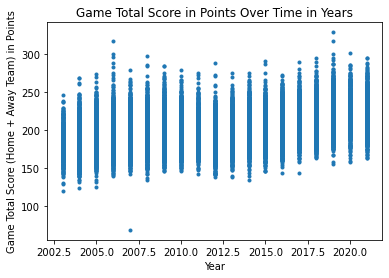

In [5]:
plt.plot(df['year'], df['total_score'], '.')
plt.xlabel("Year")
plt.ylabel("Game Total Score (Home + Away Team) in Points")
plt.title("Game Total Score in Points Over Time in Years")

From this chart we can see a general uptick in scoring during our time period. As we look at the data points as time goes on, the lower and higher bound both increase over time. While this does give us some insight, all these data points can make it hard to visualize exactly what we need to. This is where using an average will be useful! 

### Section 3.2: Average Scoring per Year

Let’s get the average score per year so there's only one data point for each year. 

Text(0.5, 1.0, 'Average Score per Game in Points Over Time in Years')

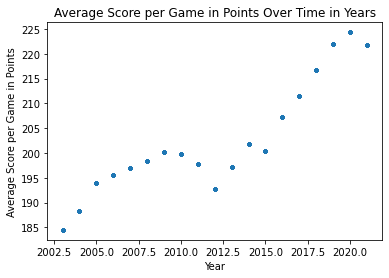

In [6]:
df['x_mean'] = df.groupby('year').total_score.transform(lambda s: s.mean())
plt.plot(df['year'], df['x_mean'], '.')
plt.xlabel("Year")
plt.ylabel("Average Score per Game in Points")
plt.title("Average Score per Game in Points Over Time in Years")

Looking at the plot above, it is evident that the average scoring per game increases over time. Since this plot shows the averages, the amount of data points in the visualization decreases significantly. While an average may not show the entire picture as well as a plot with every game as a data point, it is still a reliable method that makes viewing the pattern a lot easier. 

We now have looked at two plots that show how scoring has increased overtime. However, in the NBA there are a few different ways to score that were mentioned earlier being three point shots, two point shots, and free throws. Each of these may have increased differently, with one having more impact than another depending on the year. This is why it is important to look at plots of each of these individually. 

### Section 3.3: Field Goal Percentage

Field Goal Percentage(FG%), according to Basketball-Reference.com is the ratio of field goals made to field goals attempted. 
This includes all shots including dunks, lay-ups, two-point shots, and three-point shots. Let's see how it has changed overtime!

Text(0.5, 1.0, 'Average Field Goal Percentage per Game Over Time in Years')

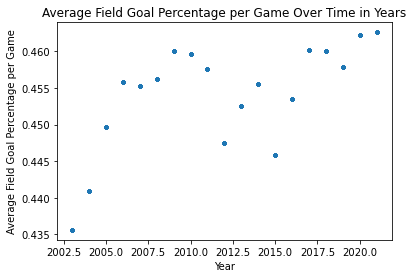

In [7]:
df['x_mean'] = df.groupby('year').avg_FG_PCT.transform(lambda s: s.mean())
plt.plot(df['year'], df['x_mean'], '.')
plt.xlabel("Year")
plt.ylabel("Average Field Goal Percentage per Game")
plt.title("Average Field Goal Percentage per Game Over Time in Years")

### Section 3.4: Three-Point Shot Percentage

Text(0.5, 1.0, 'Average Three Point Percentage per Game in Points Over Time in Years')

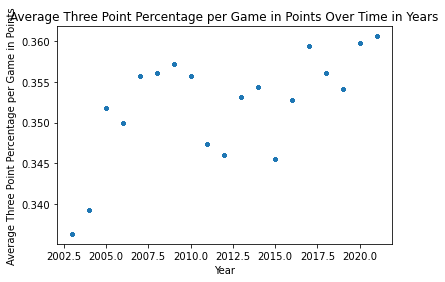

In [8]:
df['x_mean'] = df.groupby('year').avg_FG3_PCT.transform(lambda s: s.mean())
plt.plot(df['year'], df['x_mean'], '.')
plt.xlabel("Year")
plt.ylabel("Average Three Point Percentage per Game")
plt.title("Average Three Point Percentage per Game Over Time in Years")

Insert analysis

### Section 3.5: Free Throw Percentage

Text(0.5, 1.0, 'Average Free Throw Percentage per Game in Points Over Time in Years')

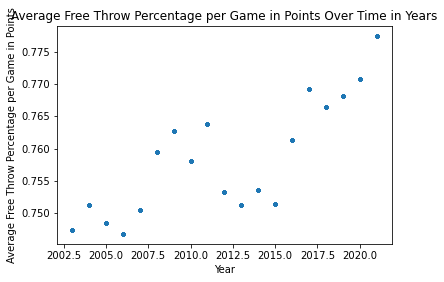

In [9]:
df['x_mean'] = df.groupby('year').avg_FT_PCT.transform(lambda s: s.mean())
plt.plot(df['year'], df['x_mean'], '.')
plt.xlabel("Year")
plt.ylabel("Average Free Throw Percentage per Game")
plt.title("Average Free Throw Percentage per Game Over Time in Years")

insert analysis

### Section 3.6: Assists 

Text(0.5, 1.0, 'Average Assists per Game Over Time in Years')

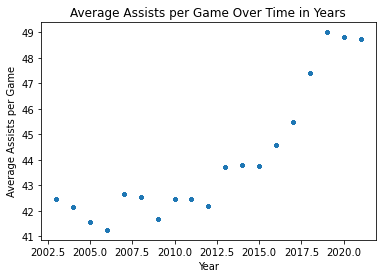

In [10]:
df['x_mean'] = df.groupby('year').total_assists.transform(lambda s: s.mean())
plt.plot(df['year'], df['x_mean'], '.')
plt.xlabel("Year")
plt.ylabel("Average Assists per Game")
plt.title("Average Assists per Game Over Time in Years")

Insert analysis

### Section 3.7: Rebounds

Text(0.5, 1.0, 'Average Rebounds per Game Over Time in Years')

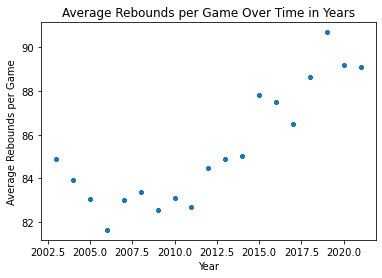

In [11]:
df['x_mean'] = df.groupby('year').total_rebounds.transform(lambda s: s.mean())
plt.plot(df['year'], df['x_mean'], '.')
plt.xlabel("Year")
plt.ylabel("Average Rebounds per Game")
plt.title("Average Rebounds per Game Over Time in Years")

Insert analysis

### Section 3.8: Total Points - Home vs Away

Now we will do an analysis of the same catagories but now comparing the increases among home and away teams

Text(0.5, 1.0, 'Average Points per Game Over Time in Years')

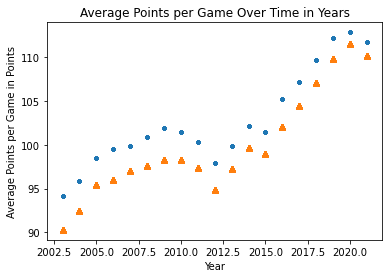

In [12]:
df['home_mean'] = df.groupby('year').PTS_home.transform(lambda s: s.mean())
df['away_mean'] = df.groupby('year').PTS_away.transform(lambda s: s.mean())
plt.plot(df['year'], df['home_mean'], '.')
plt.plot(df['year'], df['away_mean'], '^')
plt.xlabel("Year")
plt.ylabel("Average Points per Game")
plt.title("Average Points per Game Over Time in Years")

Insert Analysis

### Section 3.9: Field Goal Percentage - Home vs Away

Text(0.5, 1.0, 'Average Field Goal Percentage per Game Over Time in Years')

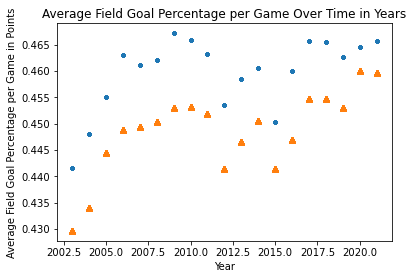

In [13]:
df['home_mean'] = df.groupby('year').FG_PCT_home.transform(lambda s: s.mean())
df['away_mean'] = df.groupby('year').FG_PCT_away.transform(lambda s: s.mean())
plt.plot(df['year'], df['home_mean'], '.')
plt.plot(df['year'], df['away_mean'], '^')
plt.xlabel("Year")
plt.ylabel("Average Field Goal Percentage per Game")
plt.title("Average Field Goal Percentage per Game Over Time in Years")

Insert Analysis

### Section 3.10: Three Point Percentage - Home vs Away

Text(0.5, 1.0, 'Average Three Point Percentage per Game Over Time in Years')

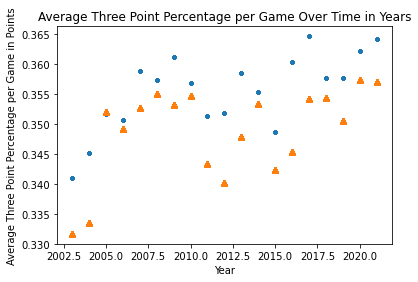

In [14]:
df['home_mean'] = df.groupby('year').FG3_PCT_home.transform(lambda s: s.mean())
df['away_mean'] = df.groupby('year').FG3_PCT_away.transform(lambda s: s.mean())
plt.plot(df['year'], df['home_mean'], '.')
plt.plot(df['year'], df['away_mean'], '^')
plt.xlabel("Year")
plt.ylabel("Average Three Point Percentage per Game")
plt.title("Average Three Point Percentage per Game Over Time in Years")

Insert Analysis

### Section 3.11: Free Throw Percentage - Home vs Away

Text(0.5, 1.0, 'Average Free Throw Percentage per Game Over Time in Years')

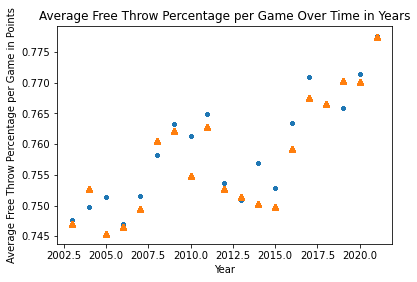

In [15]:
df['home_mean'] = df.groupby('year').FT_PCT_home.transform(lambda s: s.mean())
df['away_mean'] = df.groupby('year').FT_PCT_away.transform(lambda s: s.mean())
plt.plot(df['year'], df['home_mean'], '.')
plt.plot(df['year'], df['away_mean'], '^')
plt.xlabel("Year")
plt.ylabel("Average Free Throw Percentage per Game")
plt.title("Average Free Throw Percentage per Game Over Time in Years")

Insert Analysis

### Section 3.12: Assists - Home vs Away

Text(0.5, 1.0, 'Average Asists per Game Over Time in Years')

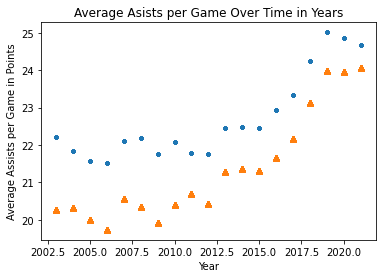

In [16]:
df['home_mean'] = df.groupby('year').AST_home.transform(lambda s: s.mean())
df['away_mean'] = df.groupby('year').AST_away.transform(lambda s: s.mean())
plt.plot(df['year'], df['home_mean'], '.')
plt.plot(df['year'], df['away_mean'], '^')
plt.xlabel("Year")
plt.ylabel("Average Assists per Game")
plt.title("Average Asists per Game Over Time in Years")

Insert Analysis

### Section 3.13: Rebounds Percentage - Home vs Away

Text(0.5, 1.0, 'Average Rebounds per Game Over Time in Years')

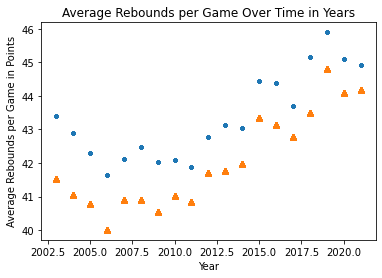

In [17]:
df['home_mean'] = df.groupby('year').REB_home.transform(lambda s: s.mean())
df['away_mean'] = df.groupby('year').REB_away.transform(lambda s: s.mean())
plt.plot(df['year'], df['home_mean'], '.')
plt.plot(df['year'], df['away_mean'], '^')
plt.xlabel("Year")
plt.ylabel("Average Rebounds per Game")
plt.title("Average Rebounds per Game Over Time in Years")

Insert Analysis

# Part 3: Machine Learning Algorithm

# Part 4: Reflection and Conclusion